In [1]:
import time
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
# 圖片像素
plt.rcParams['figure.figsize'] = (5.0, 4.0) # set default size of plots
# 插值
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'


# dataset

↓ 這裡使用的dataset取樣自MNIST,
+  x:(?, 28,28) unsigned int
+  y:(?, 1) unsigned int 表為奇數還偶數



In [2]:
# get dataset
!gdown --id "1ol0M43I9MfC4qECiUnXVT-jYPgPiGiFH" --output data.npz
loader = np.load('data.npz')
x_train_orig, y_train_orig, x_test_orig, y_test_orig = loader.values()

Downloading...
From: https://drive.google.com/uc?id=1ol0M43I9MfC4qECiUnXVT-jYPgPiGiFH
To: C:\Users\Rubio\AppData\Roaming\SPB_16.6\data.npz

  0%|          | 0.00/67.0k [00:00<?, ?B/s]
100%|██████████| 67.0k/67.0k [00:00<00:00, 3.78MB/s]


In [3]:
# check data shape
print('train data shape: \t' + str(x_train_orig.shape))
print('train label shape: \t' + str(y_train_orig.shape))
print('test data shape: \t' + str(x_test_orig.shape))
print('test label shape: \t' + str(y_test_orig.shape))

train data shape: 	(300, 28, 28)
train label shape: 	(300,)
test data shape: 	(100, 28, 28)
test label shape: 	(100,)


↑  預期輸出:
```
train data shape: 	(300, 28, 28) -> 代表有300張圖片訓練
train label shape: 	(300,)
test data shape: 	(100, 28, 28)
test label shape: 	(100,)
```

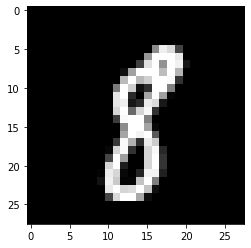

this is an even number


In [4]:
# Example of a picture
# 更改 index 可得其他圖片
index = 3
# imshow 顯示圖片
plt.imshow(x_train_orig[index])
plt.show()
LABEL = ['odd number', 'even number']
print('this is an ' + LABEL[y_train_orig[index]] )

↑  預期輸出:\
![](https://i.imgur.com/mMkP92G.png)


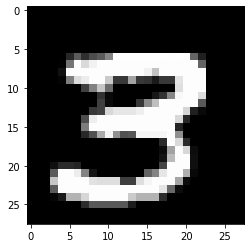

this is an odd number


In [5]:
index = 6
# imshow 顯示圖片
plt.imshow(x_train_orig[index])
plt.show()
LABEL = ['odd number', 'even number']
print('this is an ' + LABEL[y_train_orig[index]] )

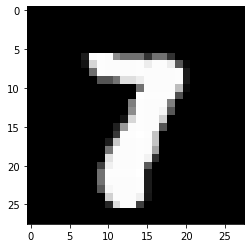

this is an odd number


In [24]:
index = 299
# imshow 顯示圖片
plt.imshow(x_train_orig[index])
plt.show()
LABEL = ['odd number', 'even number']
print('this is an ' + LABEL[y_train_orig[index]] )

# Data Preprocessing
↓ 進入MLP前，我們需要先對資料進行處理
1.  將圖片攤平(二維轉為單維陣列)，此處僅為對應**全連接層**所需之操作
2.  Standardize  Data to [0.0 ~ 1.0]
3.  將label轉為1維轉成N維資料(分成N類)(本次不需要這麼做)
4.  (本次因後續操作考量，將資料矩陣翻轉)


In [6]:
# Reshape the training and test examples 
# 一般用法：numpy.arange(n).reshape(a, b); 依次生成n個自然数，並且以a行b列的數组形式顯示:
# 特殊用法：mat (or array).reshape(c, -1); 必须是矩陣格式或者數组格式，才能使用 .reshape(c, -1) 函數， 
# 表示將此矩陣或者數组重组，以 c行d列的形式表示（-1的作用就在此，自動計算d：d=數组或者矩陣裡面所有的元素個数/c,
# d必须是整數，不然報错）（reshape(-1, e)即列數固定，行數需要計算）：
# 其他用法：numpy.arange(a,b,c)/ numpy.arange(a,b,c).reshape(m,n); 從數字a起, 步長為c, 到b结束，生成array：
# .T 為 Array Transform
x_train_flatten = x_train_orig.reshape(x_train_orig.shape[0], -1).T  
# The "-1" makes reshape flatten the remaining dimensions
x_test_flatten = x_test_orig.reshape(x_test_orig.shape[0], -1).T

# Standardize data to have feature values between 0 and 1.
x_train = x_train_flatten/255.
x_test = x_test_flatten/255.

## One-Hot encode the data label, but in this case we don't need to do
#y_train = np.eye(N)[y_train_orig].T
#y_test = np.eye(N)[y_test_orig].T
y_train = y_train_orig.reshape([1,-1])
y_test = y_test_orig.reshape([1,-1])

# check data shape
print('train data shape: \t' + str(x_train.shape))
print('train label shape: \t' + str(y_train.shape))
print('test data shape: \t' + str(x_test.shape))
print('test label shape: \t' + str(y_test.shape))

train data shape: 	(784, 300)
train label shape: 	(1, 300)
test data shape: 	(784, 100)
test label shape: 	(1, 100)


In [7]:
x_train_flatten

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [8]:
x_train_orig

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

↑  預期輸出:
```
train data shape: 	(784, 300)
train label shape: 	(1, 300)
test data shape: 	(784, 100)
test label shape: 	(1, 100)
```

# Forward and Backward
1. forward\
  $\text{cost} = L(F(w))$
2. backward\
  $-\triangle{w} \propto \frac{d\text{cost}}{dw}$

  $\frac{d\text{cost}}{dw} = \frac{dL}{dF}\frac{dF}{dw}$, (by *Chain Rule*)

  
  


##  linear function
1. forward\
 $ z = f(X,W,b) = \sum_{i=1}^{n}(W_i \cdot X_i) + b$

2. backward\
 $ -\triangle W_i \propto \frac{dL}{df} \cdot X_i $

 $ -\triangle dx_i \propto \frac{dL}{df} \cdot W_i $

 $ -\triangle db \propto \frac{dL}{df} \cdot 1 $


↓ 可參考: [numpy.dot](https://docs.scipy.org/doc/numpy/reference/generated/numpy.dot.html) , etc

In [9]:
# linear layer forward propagation 內積型式
def linear_forward(X, W, b):
    """
    Arguments:
    X -- output from previous layer (or input data): (size of previous layer, number of examples)
    W -- weights matrix: numpy array of shape (size of current layer, size of previous layer)
    b -- bias vector, numpy array of shape (size of the current layer, 1)

    Returns:
    Z -- the input of the activation function, also called pre-activation parameter 
    cache -- a python dictionary containing "X", "W" and "b" ; stored for computing the backward pass efficiently
    """
    ##################################
    ####          TODO            ####
    ##################################
    Z = np.dot(W,X) + b
    ##################################
    ####          TODO            ####
    ##################################

    # 如果大小不同，raise exception 
    assert(Z.shape == (W.shape[0], X.shape[1]))
    cache = (X, W, b)
    
    return Z, cache


In [10]:
# check linear_forward
# 製造不同的亂數 108 個
np.random.seed(108)

num_of_input = 5
input_shape = 3
output_shape = 2

# np.random.randn(x,y) = > x rows , y columns

X = np.random.randn(input_shape, num_of_input) 
W = np.random.randn(output_shape, input_shape)
b = np.zeros((output_shape,1))

Z, cache = linear_forward(X,W,b)

print('X : ' + str(X))
print('W : ' + str(W))
print('b : ' + str(b))
print('Z : ' + str(Z))

X : [[-1.02690451  0.22174943  1.13039011  1.14618522 -0.59273429]
 [ 0.11878403 -0.48443021 -1.94491271  0.09207734  0.90216909]
 [ 1.31446859  0.77110218 -0.54014736 -0.28411518 -0.88933117]]
W : [[ 0.40416927 -1.14481162  0.54539594]
 [ 1.45406998  1.22397676  0.22120243]]
b : [[0.]
 [0.]]
Z : [[ 0.16587724  1.06476164  2.38883344  0.20288637 -1.75741625]
 [-1.05703849 -0.09992247 -0.85634353  1.71648708  0.04563466]]


↑  預期輸出:
```
X : [[-1.02690451  0.22174943  1.13039011  1.14618522 -0.59273429]
 [ 0.11878403 -0.48443021 -1.94491271  0.09207734  0.90216909]
 [ 1.31446859  0.77110218 -0.54014736 -0.28411518 -0.88933117]]
W : [[ 0.40416927 -1.14481162  0.54539594]
 [ 1.45406998  1.22397676  0.22120243]]
b : [[0.]
 [0.]]
Z : [[ 0.16587724  1.06476164  2.38883344  0.20288637 -1.75741625]
 [-1.05703849 -0.09992247 -0.85634353  1.71648708  0.04563466]]
```

In [11]:
# linear layer backward propagation
def linear_backward(dZ, cache):
    """
    Arguments:
    dZ -- Gradient of the cost with respect to the linear output
    cache -- tuple of values (X_prev, W, b) coming from the forward propagation in the current layer

    Returns:
    dX_prev -- Gradient of the cost with respect to the activation (of the previous layer l-1), same shape as X_prev
    dW -- Gradient of the cost with respect to W (current layer l), same shape as W
    db -- Gradient of the cost with respect to b (current layer l), same shape as b
    """
    X_prev, W, b = cache
    m = X_prev.shape[-1] # shape 結果後最後一個數字
    
    dW = 1./m * np.dot(dZ,X_prev.T)
    dX_prev = np.dot(W.T,dZ)
    db = 1./m * np.sum(dZ, axis = 1, keepdims = True)
    
    assert (dX_prev.shape == X_prev.shape)
    assert (dW.shape == W.shape)
    assert (db.shape == b.shape)
    
    return dX_prev, dW, db

In [12]:
# check linear_backward
np.random.seed(109)
dZ = np.random.randn(output_shape, num_of_input)

dX_prev, dW, db = linear_backward(dZ, cache)
print('dZ : ' + str(dZ))
print('dX_prev : ' + str(dX_prev))
print('dW : ' + str(dW))
print('db : ' + str(db))

dZ : [[-0.18773494  2.44063677 -0.94090784  0.61391165  0.73562667]
 [ 0.97291789  0.25919495 -0.07407492 -0.17768802 -0.83874355]]
dX_prev : [[ 1.338814    1.36331797 -0.48799614 -0.01024659 -0.92227413]
 [ 1.40575002 -2.47682075  0.98649625 -0.9202992  -1.86875658]
 [ 0.11282192  1.38844793 -0.52955286  0.2955199   0.21567569]]
dW : [[-0.01239439  0.2691105   0.26296004]
 [-0.14637246 -0.12779501  0.46303036]]
db : [[0.53230646]
 [0.02832127]]


↑  預期輸出:
```
dZ : [[-0.18773494  2.44063677 -0.94090784  0.61391165  0.73562667]
 [ 0.97291789  0.25919495 -0.07407492 -0.17768802 -0.83874355]]
dX_prev : [[ 1.338814    1.36331797 -0.48799614 -0.01024659 -0.92227413]
 [ 1.40575002 -2.47682075  0.98649625 -0.9202992  -1.86875658]
 [ 0.11282192  1.38844793 -0.52955286  0.2955199   0.21567569]]
dW : [[-0.01239439  0.2691105   0.26296004]
 [-0.14637246 -0.12779501  0.46303036]]
db : [[0.53230646]
 [0.02832127]]
```

## activation function
Sigmoid:
1. forward\
 $ Y = f(Z) = \frac{1}{1 + e^{-Z}}$

2. backward\
 $  -\triangle Z \propto \frac{dL}{dZ} = \frac{dL}{df} \cdot f(Z) \cdot (1-f(Z))$

↓ 可參考: [numpy.exp](https://docs.scipy.org/doc/numpy/reference/generated/numpy.exp.html) , etc

In [85]:
def sigmoid(Z):
    """
    Arguments:
    Z -- numpy array of any shape
    
    Returns:
    Y -- output of sigmoid(z), same shape as Z
    cache -- returns Z as well, useful during backpropagation
    """
    
    ##################################
    ####          TODO            ####
    ##################################
    Y = 1/(np.exp(-Z) + 1)
  # Y = (-np.exp(-Z) + np.exp(Z))/(np.exp(-Z) + np.exp(Z))
    ##################################
    ####          TODO            ####
    ##################################
    cache = Z

    return Y, cache

def sigmoid_backward(dY, cache):
    """
    Arguments:
    dY -- post-activation gradient, of any shape
    cache -- 'Z' where we store for computing backward propagation efficiently

    Returns:
    dZ -- Gradient of the cost with respect to Z
    """
    
    Z = cache
    ##################################
    ####          TODO            ####
    ##################################
    dZ = (1/(np.exp(-Z) + 1))*(1 - (1/(np.exp(-Z) + 1)))*dY
#   dZ = (1-((-np.exp(-Z) + np.exp(Z))/(np.exp(-Z) + np.exp(Z)))**2)*dY
    ##################################
    ####          TODO            ####
    ##################################
    
    assert (dZ.shape == Z.shape)
    
    return dZ


In [86]:
# check sigmoid and sigmoid_backward
Z = np.array([-2., -1., 0., 1., 2.])
Y, cache = sigmoid(Z)
dZ = sigmoid_backward(0.5, cache)
print('Y : ' + str(Y))
print('dZ : ' + str(dZ))

Y : [0.11920292 0.26894142 0.5        0.73105858 0.88079708]
dZ : [0.05249679 0.09830597 0.125      0.09830597 0.05249679]


↑  預期輸出:
```
Y : [0.11920292 0.26894142 0.5        0.73105858 0.88079708]
dZ : [0.05249679 0.09830597 0.125      0.09830597 0.05249679]
```

# Loss or Cost
象徵網路的性能(通常是表示有多差，數值越小越好)，求其梯度方向來做為優化參數的方向(梯度反向)

## Cross Entropy
+ define

  $J(W) = CE(P, Y) = \frac{\sum_{i=1}^{n}(-y_i\log(p_i) - (1-y_i)\log(1- p_i))}{n}$

+ gradient

  $\frac{dJ}{dP}= -\frac{Y}{P}+\frac{1-Y}{1-P}$

上面的 log 指的是數學式的 ln

↓ 可參考: [numpy.dot](https://docs.scipy.org/doc/numpy/reference/generated/numpy.dot.html) ,[numpy.ndarray.T](https://docs.scipy.org/doc/numpy/reference/generated/numpy.ndarray.T.html) ,[numpy.log](https://docs.scipy.org/doc/numpy/reference/generated/numpy.log.html) ,[numpy.divide](https://docs.scipy.org/doc/numpy/reference/generated/numpy.divide.html) , etc

In [87]:
def cost(P, Y):
    """
    Arguments:
    P -- probability vector corresponding to your label predictions, shape (1, number of examples)
    Y -- true "label" vector (for example: containing 0 if non-cat, 1 if cat), shape (1, number of examples)

    Returns:
    cost -- Cross Entrophy loss
    """
    
    m = Y.shape[-1]
    
    # Compute loss from P and Y.
    ##################################
    ####          TODO            ####
    ##################################
    cost = -(np.dot(Y,np.log(P).T) + np.dot(1-Y,np.log(1-P).T))/m
#   cost = -0.5 * (np.dot(log(1-Y),(1-P).T) + np.dot(log(1+Y),(1+P).T)) + log(2)
    ##################################
    ####          TODO            ####
    ##################################

    cost = np.squeeze(cost)      # To make sure your cost's shape is what we expect (e.g. this turns [[17]] into 17).
    assert(cost.shape == ())
    
    return cost

def cost_grad(P, Y):
    """
    Arguments:
    P -- probability vector corresponding to your label predictions, shape (1, number of examples)
    Y -- true "label" vector (for example: containing 0 if non-cat, 1 if cat), shape (1, number of examples)

    Returns:
    grad -- Gradient of the cost
    """
    
    m = Y.shape[-1]

    # Compute gradient of the cost from P and Y.
    ##################################
    ####          TODO            ####
    ##################################
    grad = -(Y/P - (1-Y)/(1-P))
#   grad = -.5*((1+P)/(1+Y) - (1-P)/(1-Y))
    ##################################
    ####          TODO            ####
    ##################################  
    return grad


In [88]:
# check CE and gradient of it
P = np.array([[0.5, .9]])
Y = np.array([[0.0, 1.0]])
loss = cost(P,Y)
grad = cost_grad(P,Y)

print('CE loss : %.4f' % loss)
print('gradients : ' + str(grad))

CE loss : 0.3993
gradients : [[ 2.         -1.11111111]]


↑  預期輸出:
```
CE loss : 0.3993
gradients : [[ 2.         -1.11111111]]
```

# Perceptron
![](https://i.imgur.com/3kbN5FW.png)

In [89]:
# fully one layer perceptron forward
def layer_forward(X, W, b):
    """
    Arguments:
    X -- activations from previous layer (or input data): (size of previous layer, number of examples)
    W -- weights matrix: numpy array of shape (size of current layer, size of previous layer)
    b -- bias vector, numpy array of shape (size of the current layer, 1)
    
    Returns:
    Y -- the output of the activation function
    cache -- a python dictionary containing "linear_cache" and "activation_cache";
            stored for computing the backward pass efficiently
    """
    ##################################
    ####          TODO            ####
    ##################################
    Z, linear_cache = linear_forward(X, W, b)
    Y, activation_cache = sigmoid(Z)
    ##################################
    ####          TODO            ####
    ##################################

    cache = (linear_cache, activation_cache)
    return Y, cache

# fully one layer perceptron backward
def layer_backward(dY, cache):
    """
    Arguments:
    dY -- post-activation gradient for current layer l 
    cache -- tuple of values (linear_cache, activation_cache) we store for computing backward propagation efficiently
    
    Returns:
    dX -- Gradient of the cost with respect to the activation (of the previous layer l-1)
    dW -- Gradient of the cost with respect to W (current layer l), same shape as W
    db -- Gradient of the cost with respect to b (current layer l), same shape as b
    """
    linear_cache, activation_cache = cache
    ##################################
    ####          TODO            ####
    ##################################
    dZ = sigmoid_backward(dY, activation_cache)
    dX, dW, db = linear_backward(dZ, linear_cache)
    ##################################
    ####          TODO            ####
    ##################################
    return dX, dW, db

## Multi-layer Perceptron

In [130]:
# define our model
class MultiLayerModel():
  def __init__(self, layers_dims):
    """
    Arguments:
    layers_dims --  list containing the input size and each layer size
    """
    assert len(layers_dims)>=2
    self.layers_num = len(layers_dims)

    # initial parameters
    self.parameters = {}
    for l in range(1, self.layers_num):
      self.parameters['W'+str(l)] = np.random.randn(layers_dims[l], layers_dims[l-1])
      self.parameters['b'+str(l)] = np.zeros((layers_dims[l], 1))
      # ex: self.parameters is {'W1': matrix[300, 784], 'b1':matrix[300,1], 'W2': matrix[1, 300], 'b2':matrix[1,1]} 

  def train(self, X, Y, learning_rate = 0.0075, num_iterations = 800):
    """
    Arguments:
    X --  data, numpy array of shape (num_px * num_px, number of examples)
    Y --  label, numpy array of shape (1, number of examples)
    learning_rate -- learning rate of the optimization method(SGD)
    num_iterations -- number of iterations of the train loop

    Returns:
    log -- tuple of values (loss, acc) we store record of evaluation indicators
    """
    log = {'loss':[], 'acc':[]}
    for i in range(num_iterations):
      outputs = {0:X} # dictionary to store output of each layers
      caches = {} # dictionary to store cache of each layers for computing backward propagation 
      grads = {} # dictionary to store gradient of the cost with respect to each parameters 
      # forward
      for l in range(1, self.layers_num):
        outputs[l], caches[l] = layer_forward(outputs[l-1], self.parameters['W'+str(l)], self.parameters['b'+str(l)])

      # comput loss,accuracy  and gradient of loss for backwward
      current_loss = cost(outputs[self.layers_num-1], Y)
      acc = self.accuracy(outputs[self.layers_num-1], Y)
      grads['Y'+str(self.layers_num-1)] = cost_grad(outputs[self.layers_num-1], Y)
      
      # backward
      for l in range(self.layers_num-1, 0, -1):
        grads['Y'+str(l-1)], grads['W'+str(l)], grads['b'+str(l)] = layer_backward(grads['Y'+str(l)], caches[l])

      # update parameters (by SGD)
      for l in range(1, self.layers_num):
        self.parameters['W'+str(l)] += -1 * learning_rate * grads['W'+str(l)]
        self.parameters['b'+str(l)] += -1 * learning_rate * grads['b'+str(l)]
      
      if (i%100) == 0:
        print('[Epoch %d] [Loss : %.6f] [Acc : %3d%%]' % (i, current_loss, 100*acc))
      log['loss'].append(current_loss)
      log['acc'].append(acc)

    return log

  def predict(self, X):
    """
    Arguments:
    X --  data, numpy array of shape (num_px * num_px, number of examples)
    
    Returns:
    Y --  predict output, numpy array of shape (1, number of examples)
    """
    Y = X
    for l in range(1, self.layers_num):
        Y, _ = layer_forward(Y, self.parameters['W'+str(l)], self.parameters['b'+str(l)])
    return np.around(Y)

  def accuracy(self, P, Y):
    """
    Arguments:
    P --  predict output, numpy array of shape (1, number of examples)
    Y --  label, numpy array of shape (1, number of examples)
    
    Returns:
    acc --  accuracy by compare predict an label, float
    """
    acc = np.sum(np.squeeze(np.around(P) == Y)) / Y.shape[-1]
    return acc

In [217]:
# create our model
np.random.seed(109)
layers_dims = [784
               , 315 # you can change this number(number of neurons in hidden layer)
               , 1]
model = MultiLayerModel(layers_dims)

In [218]:
# train our model
log = model.train(x_train, y_train)

[Epoch 0] [Loss : 4.097987] [Acc :  49%]
[Epoch 100] [Loss : 1.706520] [Acc :  53%]
[Epoch 200] [Loss : 1.260342] [Acc :  63%]
[Epoch 300] [Loss : 1.003502] [Acc :  69%]
[Epoch 400] [Loss : 0.839400] [Acc :  74%]
[Epoch 500] [Loss : 0.721977] [Acc :  79%]
[Epoch 600] [Loss : 0.631053] [Acc :  82%]
[Epoch 700] [Loss : 0.557316] [Acc :  83%]


↑  預期輸出(範例):
```
[Epoch 0] [Loss : 3.074105] [Acc :  54%]
[Epoch 100] [Loss : 1.740730] [Acc :  60%]
[Epoch 200] [Loss : 1.392251] [Acc :  66%]
.
.
.
```

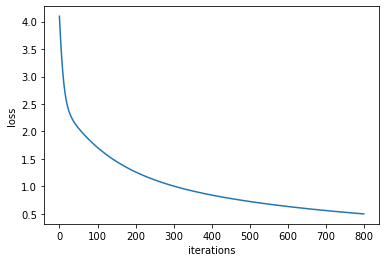

In [219]:
# plot the loss
plt.plot(np.squeeze(log['loss']))
plt.ylabel('loss')
plt.xlabel('iterations')
plt.show()

↑  預期輸出(範例):
![](https://i.imgur.com/u7NpsAp.png)

In [220]:
# check this model is work when testing
p_test = model.predict(x_test)
acc = model.accuracy(p_test, y_test)*100
print('test accuracy : %.4f%%' % acc)

test accuracy : 79.0000%


↑  預期輸出(範例):
```
test accuracy : 72.0000%
```